In [2]:
cd Downloads

/Users/tawil10/Downloads


In [3]:
import os
import numpy as np
from scipy import (integrate, optimize as op)
import scipy
from astropy import units as u
from astropy.table import Table
from glob import glob

import theano.tensor as tt

import matplotlib.pyplot as plt
import pymc3 as pm

from ccdproc import rebin as ccdproc_rebin


import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
all_table = Table.read("rotation_met.csv", format="csv")

In [5]:
subs_table = Table.read("SUBS.csv", format="csv")
young_rgb = Table.read("youngrgb.csv", format="csv")
ms = Table.read("ms2.csv", format="csv")
rgb_surf = Table.read("redgiantsurf.csv", format="csv")
subgiant_surf = Table.read("subgiantsur.csv", format="csv")
subgiant_flag = subgiant_surf['Fl3'] ==1
subgiant_surf = subgiant_surf[subgiant_flag]

In [6]:
#subgiant_flag = subgiant_surf['Fl3'] ==1


In [14]:
ms_mass = ms["Mass"][2:].astype(np.float)
ms_prot = ms["Prot"][2:].astype(np.float)
ms_prot2 = ms["Prot"][2:].astype(np.float)
ms_feh = ms["[Fe/H]"][2:].astype(np.float)
ms_teff = ms["Teff"][2:].astype(np.float)
ms_rad = ms["Rad"][2:].astype(np.float)
ms_logg = ms["log(g)"][2:].astype(np.float)

In [8]:
ii = all_table['corerot']>0
ii_r = young_rgb['dnurot']>125
iii = ms['Mass'][2:].astype(np.float)>0.8
iii_in = ms['Mass'][2:].astype(np.float)<0.8
ii_surf = rgb_surf['Mass']<1.5

#convert the rotational periods from days to surface frequencies in nHz/2pi

In [108]:
ms_prot = ms["Prot"][2:].astype(np.float)
rgb_prot = rgb_surf["Prot"].astype(np.float)
rgb_prot2 = rgb_surf["Prot"].astype(np.float)
ms_prot = 1e9/(2*np.pi*ms_prot*60*60*24)
rgb_prot = 1e9/(2*np.pi*rgb_prot*60*60*24)

(array([1.9231e+04, 1.3880e+03, 4.1400e+02, 2.4200e+02, 1.1900e+02,
        7.3000e+01, 4.6000e+01, 6.1000e+01, 2.0000e+01, 2.5000e+01,
        3.1000e+01, 1.4000e+01, 1.5000e+01, 1.6000e+01, 1.0000e+01,
        5.0000e+00, 7.0000e+00, 5.0000e+00, 1.1000e+01, 7.0000e+00]),
 array([  26.32470312,  480.96666118,  935.60861924, 1390.2505773 ,
        1844.89253537, 2299.53449343, 2754.17645149, 3208.81840955,
        3663.46036761, 4118.10232568, 4572.74428374, 5027.3862418 ,
        5482.02819986, 5936.67015792, 6391.31211599, 6845.95407405,
        7300.59603211, 7755.23799017, 8209.87994824, 8664.5219063 ,
        9119.16386436]),
 <a list of 20 Patch objects>)

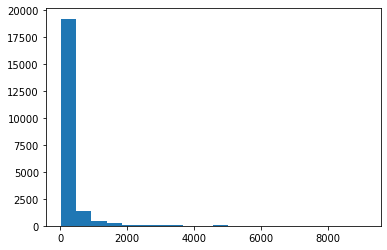

In [656]:
plt.hist(ms_prot[iii],bins= 20)

(array([2.4700e+02, 1.0780e+03, 4.9950e+03, 9.2230e+03, 1.0867e+04,
        5.4170e+03, 1.4340e+03, 5.3100e+02, 2.2500e+02, 1.1700e+02,
        4.4000e+01, 1.2000e+01, 8.0000e+00, 8.0000e+00, 9.0000e+00,
        1.7000e+01, 1.0000e+01, 1.4000e+01, 1.1000e+01, 6.0000e+00]),
 array([0.138  , 0.31515, 0.4923 , 0.66945, 0.8466 , 1.02375, 1.2009 ,
        1.37805, 1.5552 , 1.73235, 1.9095 , 2.08665, 2.2638 , 2.44095,
        2.6181 , 2.79525, 2.9724 , 3.14955, 3.3267 , 3.50385, 3.681  ]),
 <a list of 20 Patch objects>)

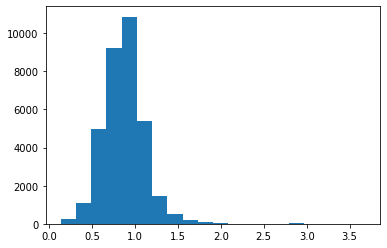

In [657]:
plt.hist(ms_mass,bins = 20)

(0.2, 1.5)

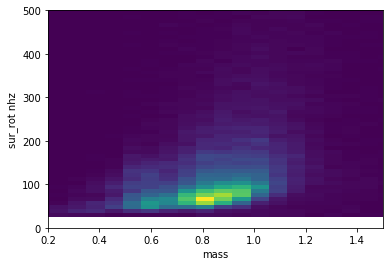

In [677]:
plt.hist2d(ms_mass,ms_prot,bins = [50,1000])
plt.xlabel('mass')
plt.ylabel('sur_rot nhz')
plt.ylim(0.,500)
plt.xlim(0.2,1.5)

(-0.7, 0.5)

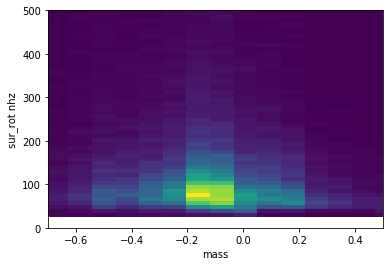

In [678]:
plt.hist2d(ms_feh,ms_prot,bins = [30,1000])
plt.xlabel('mass')
plt.ylabel('sur_rot nhz')
plt.ylim(0.,500)
plt.xlim(-0.7,0.5)

#MS stars assumes to have flat rotation profiles in r
#very little am transport on the MS. assume that the distribution of rotational rates would therefore be reflected post MS.

#mean rotational rate increases with mass. This doesn't really make sense to me. Do more research on this to work out why this is the case.

(0.8, 1.5)

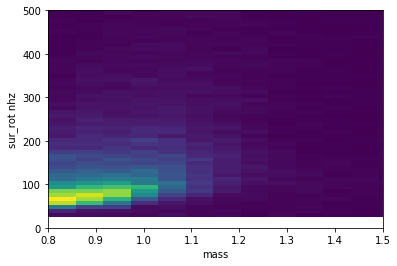

In [658]:
plt.hist2d(ms_mass[iii],ms_prot[iii],bins = [50,1000])
plt.xlabel('mass')
plt.ylabel('sur_rot nhz')
plt.ylim(0.,500)
plt.xlim(0.8,1.5)

In [ ]:
#metallicity vs mass of the sample. Doesn't appears to be a strong relationship in the 0.8-1.4 mass range that we are investigating.
#increases to the rotational rate with metallicity probably doesnt reflect this then.

(-1, 0.5)

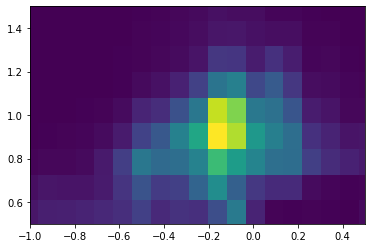

In [659]:
plt.hist2d(ms_feh,ms_mass,bins = [30,30])
plt.ylim(0.5,1.5)
plt.xlim(-1,0.5)

In [ ]:
#mean rotational rate of ms stars appears to decrease with increasing metallicity. previous figures argues that 
#the relation isn't a reflection of the mass metallicity relation.

(-1, 0.5)

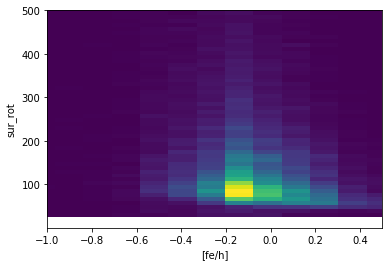

In [286]:
plt.hist2d(ms_feh[iii],ms_prot[iii],bins = [20,1000])
plt.xlabel('[fe/h]')
plt.ylabel('sur_rot')
plt.ylim(0.5,500)
plt.xlim(-1,0.5)

In [ ]:



#now we look at the relations observed in subgiants



In [357]:
subs_table

﻿KIC,m,r,logg,fe/h,teff,core,sur
str11,float64,float64,float64,float64,int64,int64,int64
KIC12508433,1.2,2.2,3.83,0.25,5248,532,213
KIC8702606,1.27,2.44,3.77,-0.09,5540,629,164
KIC5689820,1.11,2.29,3.76,0.24,5978,865,125
KIC8751420,1.5,2.83,3.71,-0.15,5264,1540,102
KIC7799349,1.33,2.77,3.68,0.41,5115,1313,122
KIC9574283,1.24,2.92,3.6,-0.4,5120,1556,74
KIC 5955122,1.11,2.0,3.884,-0.22,5543,224,298
KIC 8524425,1.07,1.75,3.978,0.02,5877,535,675


In [372]:
#stars with the same mass evolve over the same log g path.
#stars at 1.1M would show evolution of rotation differential.
#colouring with metallicity would show any effect that metallicity has on this evolution

Text(0, 0.5, 'logg')

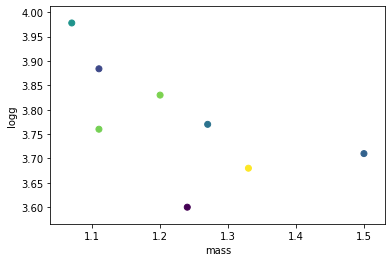

In [373]:
plt.scatter(subs_table["m"],subs_table["logg"],c = subs_table['fe/h'])
plt.xlabel('mass')
plt.ylabel('logg')

In [376]:
#evolution of star goes in left direction
#no clear separation in the core surface ratios with metallicity

Text(0, 0.5, 'core to surface rotation ratio')

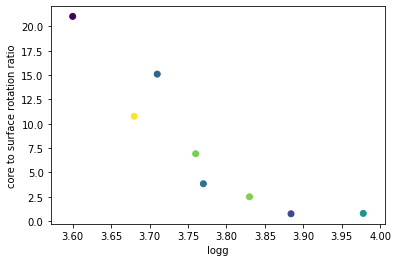

In [704]:
plt.scatter(subs_table["logg"],subs_table['core']/subs_table['sur'],c = subs_table['fe/h'])
plt.xlabel('logg')
plt.ylabel('core to surface rotation ratio')

In [ ]:
#not extremely clear in this but the core rotation increases with evolution (spin up)

#note that the earliest in their evolution (on the right) have large uncertainties on the core rotation rate

Text(0, 0.5, 'core rotation rate')

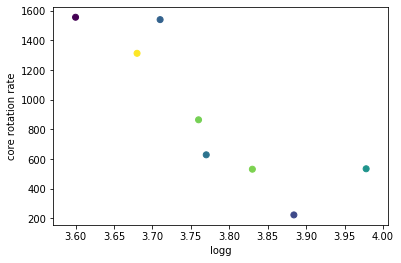

In [706]:
plt.scatter(subs_table["logg"],subs_table["core"],c = subs_table['fe/h'])
plt.xlabel('logg')
plt.ylabel('core rotation rate')

In [ ]:
#if we remove the final 2 and plot logg against the log10 of the core rotation rate we get a(n) (ok) linear relation
#the uncertainties on the core rotational rate decrease in uncertainty with evolution.

Text(0, 0.5, 'core rotation rate')

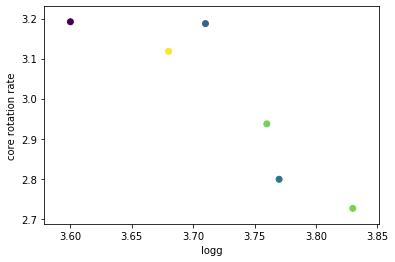

In [702]:
plt.scatter(subs_table["logg"][:-2],np.log10(subs_table["core"][:-2]),c = subs_table['fe/h'][:-2])
plt.xlabel('logg')
plt.ylabel('core rotation rate')

In [ ]:
#more clear in this, the surface is spun down with evolution from the surface radius increasing. Doesn't appear to be a clear separation with metalicity.

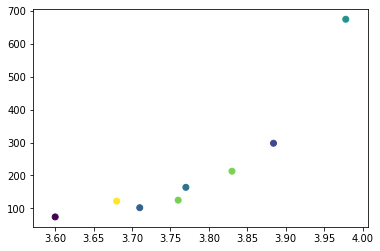

In [691]:
plt.scatter((subs_table['logg']),subs_table['sur'],c = subs_table['fe/h'])


In [ ]:
#taking the log of the surface rotation rate and plotting this against log g we get an almost linear relation
#i think this reflects the conservation of angular momentum of the surface rotation
#i can work on this to show this is actually the case.
#log(g) vs suface rotation rate makes sense in terms of how log(g) is defined. Core rotation rate would follow a similar relation
#excess angular momentum transport from the core is what we are trying to investigate. Hence we could investigate
#the differences between the core rotation rate with (core density maybe ?) and determine the difference between the
#distributions.

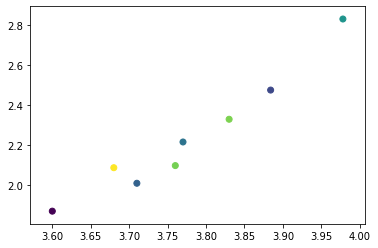

In [698]:
plt.scatter((subs_table['logg']),np.log10(subs_table['sur']),c = subs_table['fe/h'])

In [ ]:
#seemingly no connection with metallicty and the core and surface rotation rates or the ratio

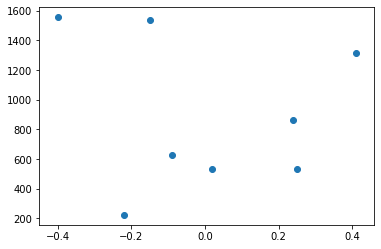

In [701]:
plt.scatter(subs_table["fe/h"],subs_table["core"])


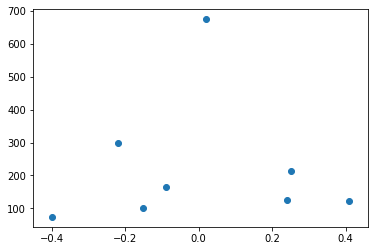

In [387]:
plt.scatter(subs_table["fe/h"],subs_table["sur"])

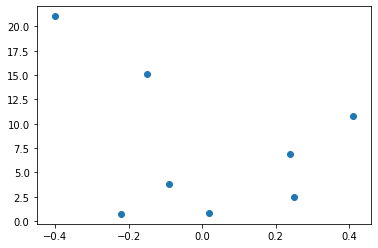

In [390]:
plt.scatter(subs_table["fe/h"],subs_table["core"]/subs_table["sur"])

In [ ]:
#mass seemingly shows a relation of increasing core rotation rate with mass. I think this is a result 
#of measurements along the subgiant branch rather than a reflection of the relation between the surface
#rotation rate and the mass for ms stars as above.

#this is because the lower mass observed are earlier in their subgiant evolution than the more massive stars.

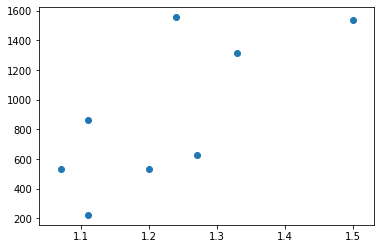

In [389]:
plt.scatter(subs_table["m"],subs_table["core"])

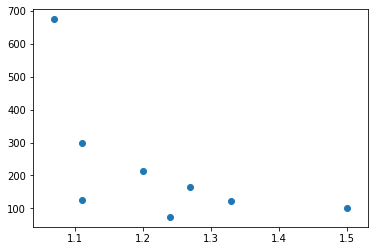

In [388]:
plt.scatter(subs_table["m"],subs_table["sur"])

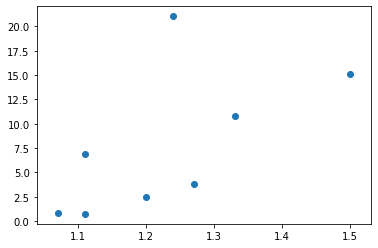

In [391]:
plt.scatter(subs_table["m"],subs_table["core"]/subs_table["sur"])

In [ ]:
#conclousion? Nothing really interesting going on with metallicity or mass. The relation between core and surface
#differential rotation is most strongly reflected in age through log g. doesn't appear to be
#strong modulation from the other parameters.

In [ ]:
#now we look at core rotation of red giants Gehan 2018

In [ ]:
#HR diagram of the sample coloured with met. Higher fe = yellower. higher Fe with lower temperature and vice versa.

(35, 38)

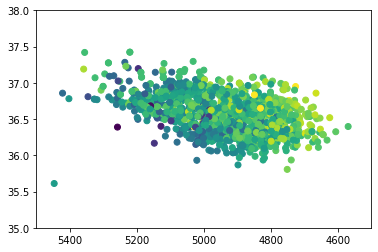

In [240]:
plt.scatter(all_table["Teff"],np.log(all_table["Rad"]*2*all_table["Teff"]**4),c = all_table["[Fe/H]"])
plt.xlim(5500, 4500)
plt.ylim(35,38)

In [241]:
import matplotlib

In [242]:
normalize = matplotlib.colors.Normalize(vmin=0, vmax=1000)

In [ ]:
#Same as above but with core rotation rate instead of met. faster rot = yellow. If i squint
#i can see more dark spots (non rotating cores) to lower temperatures. But I don't know if this is
#a reflection of physics or me wanting to see something

Text(0, 0.5, 'mag')

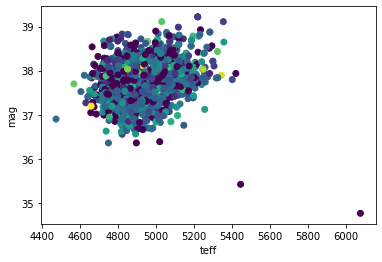

In [392]:
plt.scatter(all_table["Teff"],np.log(all_table["Rad"]**2*all_table["Teff"]**4),c = all_table["corerot"])
plt.xlabel('teff')
plt.ylabel('mag')


In [244]:
iiii = all_table["Mass"]<1.2

In [ ]:
#2d histogram of mass vs core rotation rate.
#Mean rotation (brightest of each mass bin) stays at 700 nHz with mass.
#this goes against what is observed for MS stars. Could be that the core rotation rate of RGB is independent of the intial rotation?

Text(0, 0.5, 'corerot')

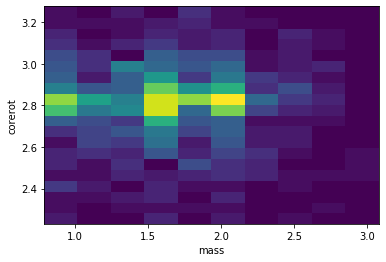

In [575]:
plt.hist2d(all_table["Mass"][ii],all_table['corerot'][ii],bins = [10,20])
plt.xlabel('mass')
plt.ylabel('corerot')

In [ ]:
#approx gaussian with mean at 600-700. Doesn't really show much

Text(0.5, 0, 'corerot')

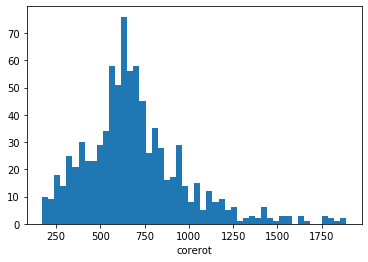

In [398]:
plt.hist(all_table['corerot'][ii],bins = 50)
plt.xlabel('corerot')

In [ ]:
#no prefered mass that would cause the mean rotation to be skewed to a single rotational rate

(array([ 67.,  55.,  50.,  27.,  38.,  58., 100.,  86.,  53.,  59., 103.,
         54.,  21.,  22.,  13.,  23.,  11.,   5.,   2.,   1.]),
 array([0.791 , 0.9056, 1.0202, 1.1348, 1.2494, 1.364 , 1.4786, 1.5932,
        1.7078, 1.8224, 1.937 , 2.0516, 2.1662, 2.2808, 2.3954, 2.51  ,
        2.6246, 2.7392, 2.8538, 2.9684, 3.083 ]),
 <a list of 20 Patch objects>)

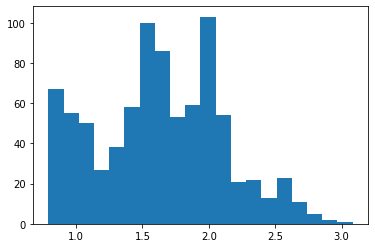

In [247]:
plt.hist(all_table['Mass'][ii],bins = 20)

In [ ]:
#core rotation vs fe/h
#again does not appear to be a change in the mean rotation rate with metallicty. Again this goes against what we see with MS stars.

Text(0.5, 0, '[fe/h]')

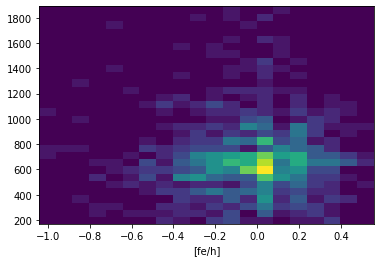

In [578]:
plt.hist2d(all_table['[Fe/H]'][ii],all_table["corerot"][ii],bins = [20,30])
plt.xlabel('[fe/h]')

In [ ]:
#this is reflected in scatter plots

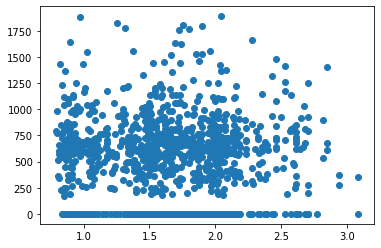

In [403]:
plt.scatter(all_table['Mass'],all_table['corerot'])

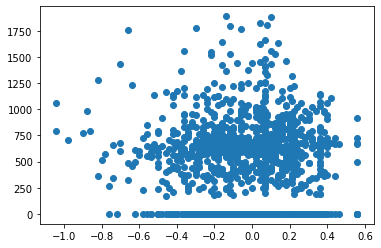

In [404]:
plt.scatter(all_table['[Fe/H]'],all_table['corerot'])

In [ ]:
#similarly with evolution (more evolved stars are lower in log g) there doesn't appear to be a change in the core rotation
#this also does not appear to vary with mass.

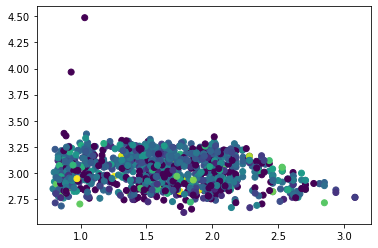

In [406]:
plt.scatter(all_table['Mass'],all_table['log(g)'],c = all_table['corerot'])

In [424]:
young_rgb

angDist,_RAJ2000,_DEJ2000,KIC,numax,e_numax,Dnu,e_Dnu,DPi1,e_DPi1,q,e_q,eps,e_eps,dnurot,e_dnurot,Simbad,_RA,_DE,_RAJ2000_1,_DEJ2000_1,KIC_1,G16,Teff,log(g),[Fe/H],Rad,Mass,rho,Dist,Av,Mod,Ref,H14,Simbad_1,_RA_1,_DE_1
float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str6,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,str4,int64,int64,str6,float64,float64
0.0036,291.05618,36.704041,1026084,45.8,0.57,4.45,0.04,250.58,0.15,0.35,0.04,0.032,0.051,40,10,Simbad,291.05618,36.704041,291.05618,36.70404,1026084,--,5039,2.583,0.07,15.032,3.152,0.00131,2665.61,0.579,DSEP,--,1,Simbad,291.05618,36.70404
0.0036,291.11435,36.703339,1026326,94.91,1.18,8.87,0.05,74.55,0.02,0.12,0.02,0.068,0.049,160,12,Simbad,291.11435,36.703339,291.11435,36.70334,1026326,--,5107,2.901,-0.42,7.852,1.791,0.00521,2383.092,0.581,DSEP,--,1,Simbad,291.11435,36.70334
0.0036,291.33423,36.786629,1027337,74.15,0.9,6.98,0.04,69.67,0.03,0.12,0.02,-0.057,0.094,240,14,Simbad,291.33423,36.786629,291.33423,36.78663,1027337,--,4673,2.787,0.28,8.8,1.728,0.00357,1367.367,0.562,DSEP,--,1,Simbad,291.33423,36.78663
0.0,291.10892,36.81329,1161618,33.71,0.51,4.08,0.04,329.95,0.16,0.19,0.03,-0.043,0.049,45,11,Simbad,291.10892,36.81329,291.10892,36.81329,1161618,--,4764,2.452,0.07,16.506,2.817,0.000882,1157.679,0.531,DSEP,--,1,Simbad,291.10892,36.81329
0.0036,291.35999,36.819889,1162746,27.18,0.48,3.81,0.04,279.19,0.12,0.3,0.04,0.02,0.061,65,12,Simbad,291.35999,36.819889,291.35999,36.81989,1162746,--,4992,2.346,-0.5,18.275,2.702,0.000623,2424.939,0.589,DSEP,--,1,Simbad,291.35999,36.81989
0.0,291.5134,36.83395,1163453,39.78,0.56,4.43,0.04,301.61,0.25,0.26,0.03,-0.171,0.072,25,7,Simbad,291.5134,36.83395,291.5134,36.83395,1163453,--,5026,2.504,0.07,16.891,3.319,0.00097,2836.904,0.596,DSEP,--,1,Simbad,291.5134,36.83395
0.0036,291.95126,36.998039,1297272,31.4,0.53,4.18,0.04,321.21,0.23,0.38,0.05,-0.061,0.073,40,10,Simbad,291.95126,36.998039,291.95126,36.99804,1297272,--,4830,2.405,-0.36,14.558,1.965,0.000897,5263.808,0.611,DSEP,--,1,Simbad,291.95126,36.99804
0.0,290.87631,37.07666,1430118,159.51,2.03,13.38,0.07,83.06,0.09,0.15,0.02,0.301,0.079,260,20,Simbad,290.87631,37.07666,290.87631,37.07666,1430118,--,5094,3.126,-0.1,6.247,1.902,0.011,2157.178,0.56,DSEP,--,1,Simbad,290.87631,37.07666
0.0,291.10834,37.07449,1430985,122.0,1.47,10.52,0.05,74.97,0.02,0.15,0.02,0.321,0.036,480,14,Simbad,291.10834,37.07449,291.10834,37.07449,1430985,--,4951,3.004,-0.34,5.344,1.051,0.0097,1472.456,0.555,DSEP,--,1,Simbad,291.10834,37.07449


In [427]:
young_rgb['log(g)']

2.583
2.901
2.787
2.452
2.346
2.504
2.405
3.126
3.004
2.499
3.089


In [ ]:
#with sample of younger red giant core rotation rates from Mosser 2012
#much smaller sample which makes the results less conclusive also includes clump stars. after removing clump stars results are more clear

(array([15., 10.,  4., 12., 11., 26., 22., 24., 22.,  9., 12.,  6.,  8.,
         2.,  3.,  2.,  0.,  1.,  2.,  1.]),
 array([  20.,  116.,  212.,  308.,  404.,  500.,  596.,  692.,  788.,
         884.,  980., 1076., 1172., 1268., 1364., 1460., 1556., 1652.,
        1748., 1844., 1940.]),
 <a list of 20 Patch objects>)

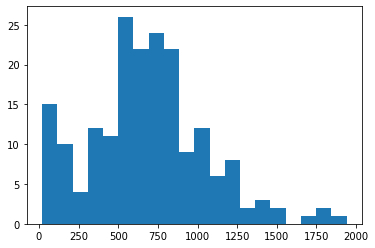

In [441]:
plt.hist(2*young_rgb['dnurot'][ii_r],bins = 20)

(array([[0., 1., 0., 3., 5., 3., 4., 0., 2., 2., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 1.],
        [1., 0., 1., 3., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
         0., 0., 0., 0.],
        [1., 2., 0., 4., 3., 3., 2., 0., 3., 1., 1., 2., 1., 0., 0., 0.,
         0., 1., 0., 0.],
        [2., 3., 6., 6., 2., 7., 5., 4., 3., 2., 1., 1., 0., 1., 1., 0.,
         0., 0., 0., 0.],
        [1., 3., 6., 4., 4., 3., 6., 2., 1., 1., 1., 1., 0., 1., 0., 1.,
         0., 0., 1., 0.],
        [2., 1., 1., 4., 1., 4., 0., 3., 1., 1., 1., 1., 0., 0., 0., 0.,
         0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 1., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [2., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]),
 array([

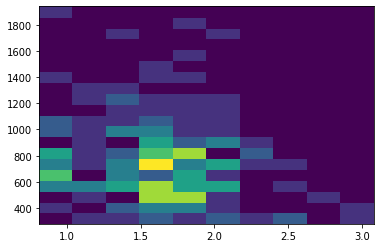

In [415]:
plt.hist2d(young_rgb['Mass'][ii_r],2*young_rgb["dnurot"][ii_r],bins = [10,20])

In [446]:
i_rad = young_rgb['Rad']<10
i_rad_c = young_rgb['Rad']>10

In [ ]:
#total sample

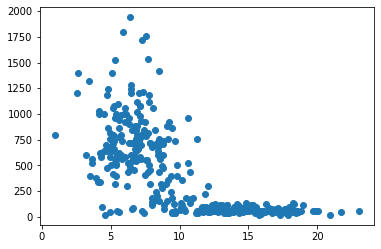

In [448]:
plt.scatter(young_rgb['Rad'],2*young_rgb['dnurot'])

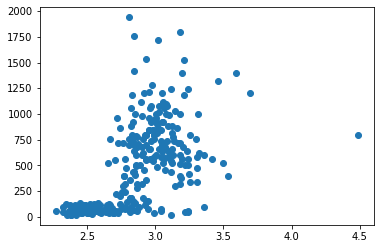

In [438]:
plt.scatter(young_rgb['log(g)'],2*young_rgb['dnurot'])

In [ ]:
#after removing the clump stars

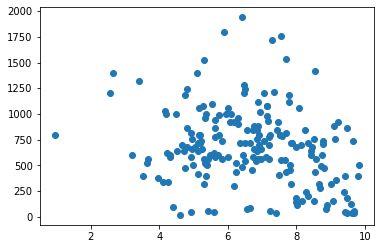

In [439]:
plt.scatter(young_rgb['Rad'][i_rad],2*young_rgb['dnurot'][i_rad])

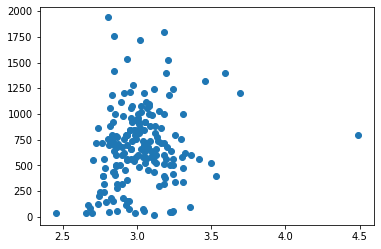

In [440]:
plt.scatter(young_rgb['log(g)'][i_rad],2*young_rgb['dnurot'][i_rad])

In [ ]:
#mass vs core rot distribution of non clump rgbs

(array([[2., 0., 0., 1., 0., 0., 7., 3., 2., 0., 4., 0., 0., 0., 0., 0.,
         0., 0., 0., 1.],
        [2., 1., 0., 1., 0., 2., 1., 0., 2., 2., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 3., 1., 1., 1., 1., 1., 2., 2., 1., 0., 0.,
         0., 0., 0., 0.],
        [3., 1., 2., 1., 2., 6., 2., 5., 5., 2., 4., 0., 3., 1., 1., 0.,
         0., 0., 1., 0.],
        [3., 2., 0., 1., 5., 7., 3., 5., 4., 1., 2., 2., 1., 0., 0., 1.,
         0., 0., 0., 0.],
        [2., 1., 1., 1., 4., 6., 4., 2., 5., 2., 1., 0., 1., 0., 1., 1.,
         0., 0., 1., 0.],
        [3., 2., 1., 1., 2., 3., 2., 3., 0., 2., 0., 2., 1., 0., 0., 0.,
         0., 1., 0., 0.],
        [1., 0., 0., 1., 0., 0., 1., 2., 1., 2., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 2., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [2., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.]]),
 array([

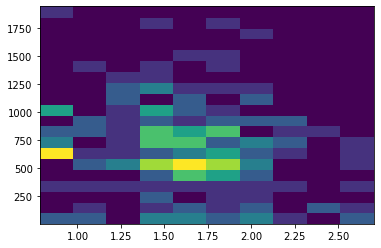

In [442]:
plt.hist2d(young_rgb['Mass'][i_rad],2*young_rgb["dnurot"][i_rad],bins = [10,20])

In [443]:
#after removing the clump stars we recover that the mean rotational rate does no evolve with mass

In [445]:
#same agin with the metallicity. There is a sample of stars that did not have core rotation observed
#which are the very slow sample at the base

(array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
         1., 1., 0., 1.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 3.,
         5., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 3.,
         1., 3., 1., 0.],
        [1

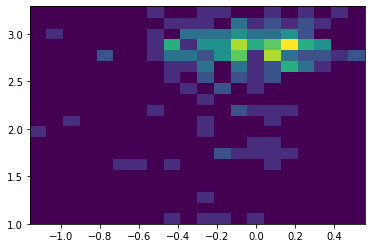

In [582]:
plt.hist2d(young_rgb['[Fe/H]'][i_rad],np.log10(2*young_rgb["dnurot"][i_rad]),bins = [20,20])

In [ ]:
#and for the clump stars? The same. no change in the mean rotation rate with mass and metallicity.
#lets just take the log to check for small changes

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  4.,  0.,  0.,
          0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  8.,  2.,  2.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  2., 16.,  1.,  1.,  3.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,

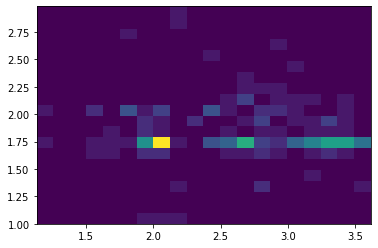

In [581]:
plt.hist2d(young_rgb['Mass'][i_rad_c],np.log10(2*young_rgb["dnurot"][i_rad_c]),bins = [20,20])

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  2.,  0.,  0.,  1., 13.,  0.,  0.,  2.,  1.,  0.,
          0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  5.,  0.,  1.,  1.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,

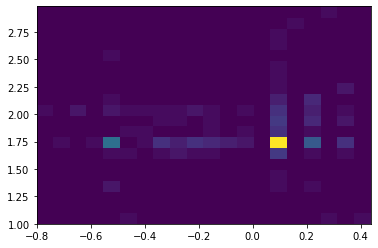

In [584]:
plt.hist2d(young_rgb['[Fe/H]'][i_rad_c],np.log10(2*young_rgb["dnurot"][i_rad_c]),bins = [20,20])

In [ ]:
#now onto RGB and subgiant surface rotation.


In [475]:
normalize_fe = matplotlib.colors.Normalize(vmin=-1, vmax=0.4)

In [ ]:
#here we show the surface rotation rates in a hr diagram with the core rotation rates that we have
#generally surface are to the top left and core more to the center but there is some overlap

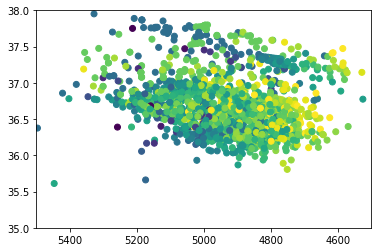

In [476]:
plt.scatter(rgb_surf["Teff"],np.log(rgb_surf["Rad"]*2*rgb_surf["Teff"]**4),c = rgb_surf["[Fe/H]"],norm=normalize_fe)
plt.xlim(5500, 4500)
plt.ylim(35,38)

plt.scatter(all_table["Teff"],np.log(all_table["Rad"]*2*all_table["Teff"]**4),c = all_table["[Fe/H]"],norm=normalize_fe)

In [509]:
normalize_cor = matplotlib.colors.Normalize(vmin=0, vmax=50)

In [ ]:
#here is the distribution of metallicities. There seems to be a stream of aqua to the top right which are of the same
#metallicity

(35, 38)

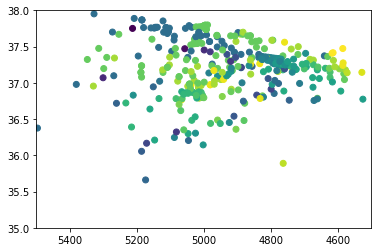

In [517]:
plt.scatter(rgb_surf["Teff"],np.log(rgb_surf["Rad"]*2*rgb_surf["Teff"]**4),c = rgb_surf['[Fe/H]'],norm = normalize_fe)
plt.xlim(5500, 4500)
plt.ylim(35,38)

In [ ]:
#lets now look at the log of the surface rotation rate. There are a lot of non rotating stars in the sample
#the spinning stars tend to be closer to the center of the plot
#also the same metallicity stream in the previous plot seem to reflect the same relation in rotational rate.

(array([14.,  7., 10.,  2.,  7., 16.,  9., 24., 64., 23.,  6., 18., 19.,
        31., 25., 12., 18., 10., 12., 33.]),
 array([0.811  , 0.95115, 1.0913 , 1.23145, 1.3716 , 1.51175, 1.6519 ,
        1.79205, 1.9322 , 2.07235, 2.2125 , 2.35265, 2.4928 , 2.63295,
        2.7731 , 2.91325, 3.0534 , 3.19355, 3.3337 , 3.47385, 3.614  ]),
 <a list of 20 Patch objects>)

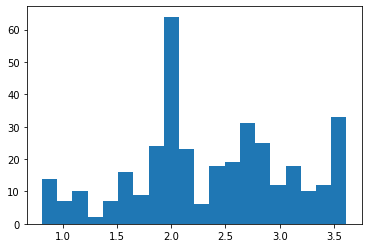

In [682]:
plt.hist(rgb_surf['Mass'],bins = 20)

(35, 39)

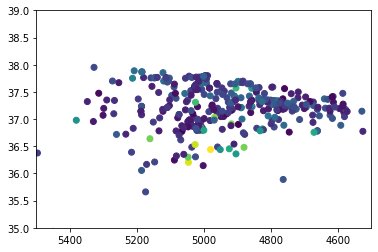

In [530]:
plt.scatter(rgb_surf["Teff"],np.log(rgb_surf["Rad"]*2*rgb_surf["Teff"]**4),c = np.log10(rgb_prot))
plt.xlim(5500, 4500)
plt.ylim(35,39)

Text(0.5, 0, 'rgb_surface')

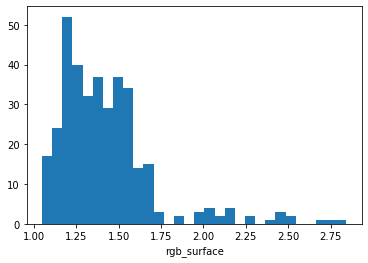

In [541]:
plt.hist(np.log10(rgb_prot),bins =30)
plt.xlabel('rgb_surface')

Text(0.5, 0, 'rgb_surface')

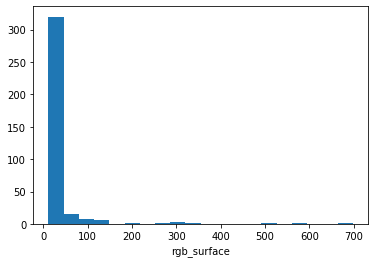

In [533]:
plt.hist(rgb_prot,bins = 20)
plt.xlabel('rgb_surface')

In [ ]:
#looking at the histogram of the mass and rotation rate there doesnt appear to be a relation between the surface rate
#and the mass as is reflected in the MS sample above
#this is the total sample, without seperating the clump and non clump. This may have some effect.

(0, 100)

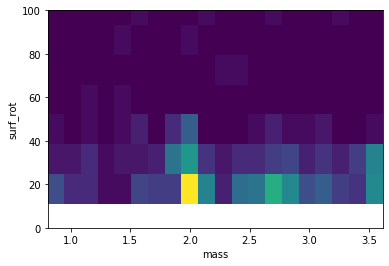

In [586]:
plt.hist2d(rgb_surf['Mass'],rgb_prot,bins = [20,50])
plt.xlabel('mass')
plt.ylabel('surf_rot')
plt.ylim(0,100)

In [ ]:
#likewise in the mass vs log of the surface rotation rate.

Text(0, 0.5, 'surf_rot')

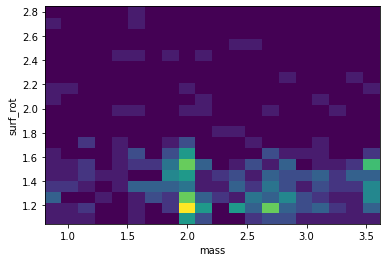

In [680]:
plt.hist2d(rgb_surf['Mass'],np.log10(rgb_prot),bins = [20,20])
plt.xlabel('mass')
plt.ylabel('surf_rot')
#plt.ylim(0,100)

In [ ]:
#separate out clump and non clump stars

In [550]:
rgb_surf_clump = rgb_surf['log(g)']<2.5
rgb_surf_noclump = rgb_surf['log(g)']>2.5

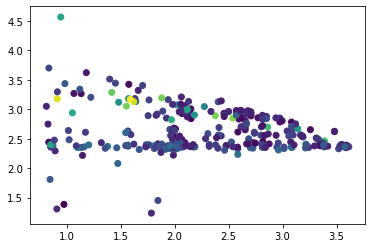

In [547]:
plt.scatter(rgb_surf['Mass'],rgb_surf['log(g)'],c = np.log10(rgb_prot))

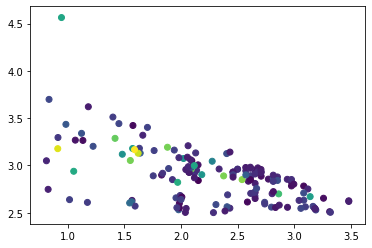

In [551]:
plt.scatter(rgb_surf['Mass'][rgb_surf_noclump],rgb_surf['log(g)'][rgb_surf_noclump],c = np.log10(rgb_prot[rgb_surf_noclump]))

In [ ]:
#surface rotation period vs mass of non clump stars
#again no mass relation

(1, 3)

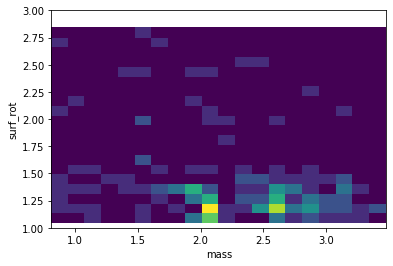

In [593]:
plt.hist2d(rgb_surf['Mass'][rgb_surf_noclump],np.log10(rgb_prot[rgb_surf_noclump]),bins = [20,20])
plt.xlabel('mass')
plt.ylabel('surf_rot')
plt.ylim(1,3)

In [563]:
#surface rotation period vs mass of clump stars.
#If I squint there could be a decrease in the mean rotation rate with mass. But this would require a much larger sample.

(1, 2.25)

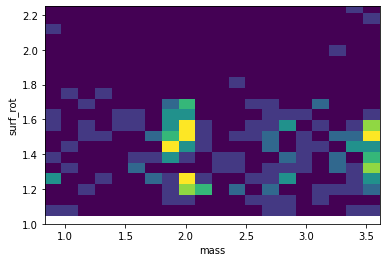

In [681]:
plt.hist2d(rgb_surf['Mass'][rgb_surf_clump],np.log10(rgb_prot[rgb_surf_clump]),bins = [20,20])
plt.xlabel('mass')
plt.ylabel('surf_rot')
plt.ylim(1,2.25)

Text(0, 0.5, 'sur_rot')

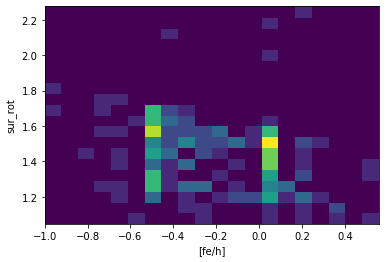

In [591]:
plt.hist2d(rgb_surf['[Fe/H]'][rgb_surf_clump],np.log10(rgb_prot[rgb_surf_clump]),bins = [20,20])
plt.xlabel('[fe/h]')
plt.ylabel('sur_rot')
#plt.ylim(10,100)

Text(0, 0.5, 'sur_rot')

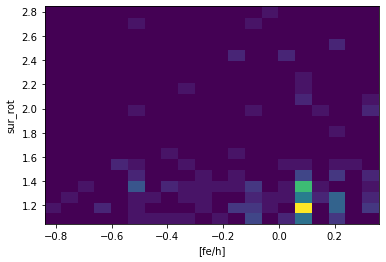

In [592]:
plt.hist2d(rgb_surf['[Fe/H]'][rgb_surf_noclump],np.log10(rgb_prot[rgb_surf_noclump]),bins = [20,20])
plt.xlabel('[fe/h]')
plt.ylabel('sur_rot')
#plt.ylim(10,100)

In [ ]:
#now some subgiant surface rotations (allegedly)

(34, 35)

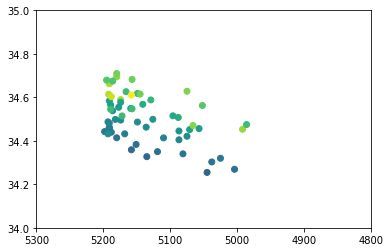

In [603]:
plt.scatter(subgiant_surf["Teff"],np.log(subgiant_surf["Rad"]*2*subgiant_surf["Teff"]**4),c = subgiant_surf['Mass'])
plt.xlim(5300, 4800)
plt.ylim(34,35)

In [ ]:
#these "subgiant" stars are of a higher logg than the ms values of the same mass.
#these don't seem right. Let's ignore these values

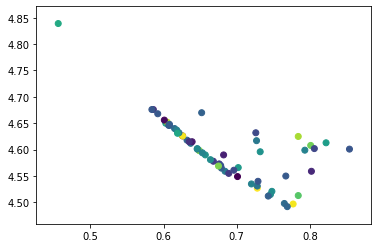

In [644]:
plt.scatter(subgiant_surf['Mass'],subgiant_surf['log(g)'],c = np.log10(1/subgiant_surf['Prot']))

In [ ]:
#if we instead just look at the mass vs log(g) of the total kepler "ms" sample then there must be some evolved stars
#in the sample. 
#we could separate out the evolved and non evolved stars to investigate if there is any difference in the distribution of the rotational rates that
#either reflect or do not reflect the ms rotation distribution observed above.

In [23]:
import matplotlib

In [227]:
normalize = matplotlib.colors.Normalize(vmin=0, vmax=np.max(150))

In [113]:
np.max(rgb_prot2)

165.07

In [228]:
j = ms_prot2<10
jjj = ms_prot2>40
jj = (ms_prot2<40) & (ms_prot2>10)

In [229]:
me = all_table['corerot']>0

In [230]:
corerot_p = 1/(all_table['corerot']*2*np.pi*0.0000864)
corerot_sub = 1/(subs_table['core']*2*np.pi*0.0000864)
surfrot_sub = 1/(subs_table['sur']*2*np.pi*0.0000864)
young_rgb_core = 1/(2*young_rgb['dnurot']*2*np.pi*0.0000864)

In [ ]:
#MS into surface rotation of more evolved stars.more evolved stars shown at ~5000K. note that the colours shows
#the period of rotation. Beyond 6000K the kraft limit takes hold. before that the rotational rate increases with
#mass and thus temp.
#in the post MS evolution zone, the surface rotation tends to be slower than that on the main sequence
#as expected.
#Beyond the subgiant and young RGB region the surface rotationappears to increase again, potentially in the
#red clump @ 2.5 logg. The rotational rate appears to be approx constant along here.

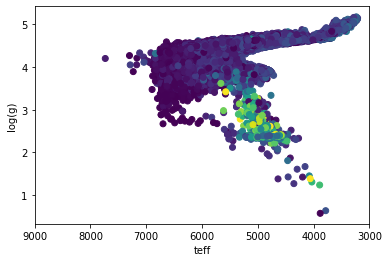

In [234]:
plt.scatter(ms_teff,ms_logg,c = ms_prot2, norm=normalize)
#plt.scatter(subgiant_surf['Mass'],subgiant_surf['log(g)'])
plt.xlabel('teff')
plt.ylabel('log(g)')
plt.xlim(9000.,3000)
#plt.xlim(0.7,1.5)
plt.scatter(rgb_surf["Teff"],rgb_surf['log(g)'],c = rgb_prot2,norm = normalize)
#plt.scatter(all_table['Teff'][me],all_table['log(g)'][me],c = corerot_p[me],norm=normalize)
#plt.scatter(subs_table['teff'],subs_table['logg'],c = corerot_sub,norm=normalize)
plt.scatter(subs_table['teff'],subs_table['logg'],c = surfrot_sub,norm=normalize)
plt.scatter(subgiant_surf['Teff'],subgiant_surf['log(g)'],c = subgiant_surf['Prot'],norm=normalize)


In [ ]:
#MS surface period as well as the core rotational period of post MS stars.
#note that the period of the core tends to be quite quick owing to the darkness of the core rotation in the
#post MS region.


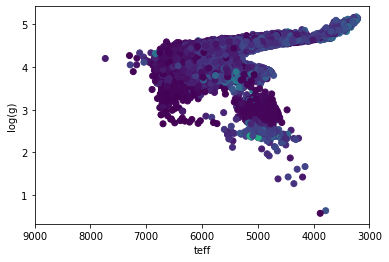

In [232]:
plt.scatter(ms_teff,ms_logg,c = ms_prot2, norm=normalize)
#plt.scatter(subgiant_surf['Mass'],subgiant_surf['log(g)'])
plt.xlabel('teff')
plt.ylabel('log(g)')
plt.xlim(9000.,3000)
#plt.xlim(0.7,1.5)
#plt.scatter(rgb_surf["Teff"],rgb_surf['log(g)'],c = rgb_prot2,norm = normalize)
plt.scatter(all_table['Teff'][me],all_table['log(g)'][me],c = corerot_p[me],norm=normalize)
plt.scatter(subs_table['teff'],subs_table['logg'],c = corerot_sub,norm=normalize)
plt.scatter(young_rgb['Teff'],young_rgb['log(g)'],c = young_rgb_core,norm=normalize)
#plt.scatter(subs_table['teff'],subs_table['logg'],c = surfrot_sub,norm=normalize)

In [236]:
normalize = matplotlib.colors.Normalize(vmin=-2, vmax=1)

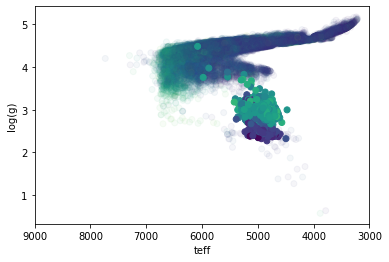

In [241]:
plt.scatter(ms_teff,ms_logg,c = np.log10(1/ms_prot2), norm=normalize,alpha = 0.05)
#plt.scatter(subgiant_surf['Mass'],subgiant_surf['log(g)'])
plt.xlabel('teff')
plt.ylabel('log(g)')
plt.xlim(9000.,3000)
#plt.xlim(0.7,1.5)
#plt.scatter(rgb_surf["Teff"],rgb_surf['log(g)'],c = rgb_prot2,norm = normalize)
plt.scatter(all_table['Teff'][me],all_table['log(g)'][me],c = np.log10(1/corerot_p[me]),norm=normalize)
plt.scatter(subs_table['teff'],subs_table['logg'],c = np.log10(1/corerot_sub),norm=normalize)
plt.scatter(young_rgb['Teff'],young_rgb['log(g)'],c = np.log10(1/young_rgb_core),norm=normalize)
#plt.scatter(subs_table['teff'],subs_table['logg'],c = surfrot_sub,norm=normalize)

In [ ]:
#taking log 10 of the frequency normalized between -2 and 1 we can see the differences in the core rotation
#post MS much more clearly. 
#the core rotation is much quicker in the early RGB but is approximately constant during the RGB before droping 
#again at the red clump.

In [ ]:
#I know this isn't a good way to check this but because of the low sample size of core rotation rates of subgiants its
#the best we can do


In [245]:
np.mean(1/corerot_sub)

0.48817333907837934

In [244]:
np.mean(1/corerot_p[me])

0.3766346128674591

In [ ]:
#The core rotation rate of the subgiants of the sample is larger than the mean core rotation rate of the RGB sample
#this means there needs to be a loss of the angular momentum from the core during the subgiant branch
#after the rotational differential has been created by the compressions and expansion of the core and 
#surface.

#I need to research this part more. Might be just what we expect but loss of more angular momentum from the core
#during the subgiant just before the rgb isn't reflected in models.

(array([477., 274.,  63.,  24.,  10.]),
 array([ 0.97464079,  2.94685511,  4.91906942,  6.89128373,  8.86349804,
        10.83571236]),
 <a list of 5 Patch objects>)

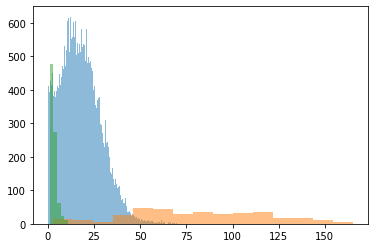

In [142]:
plt.hist(ms_prot2,bins=150,alpha=0.5)
plt.hist(rgb_prot2,bins=15,alpha=0.5)
plt.hist(corerot_p[me],bins=5,alpha=0.5)


(0, 1)

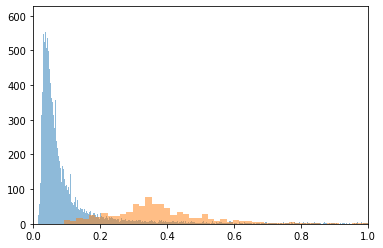

In [154]:
plt.hist(1/ms_prot2,bins=5000,alpha=0.5)
#plt.hist(rgb_prot2,bins=15,alpha=0.5)
plt.hist(1/corerot_p[me],bins=50,alpha=0.5)
plt.xlim(0,1)

(array([156., 107., 130., 240., 157., 226.,  59.,  43.,  22.,   4.]),
 array([0.791 , 1.0202, 1.2494, 1.4786, 1.7078, 1.937 , 2.1662, 2.3954,
        2.6246, 2.8538, 3.083 ]),
 <a list of 10 Patch objects>)

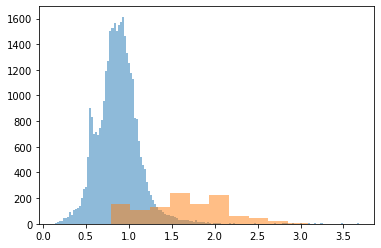

In [161]:
plt.hist(ms_mass,bins=150,alpha = 0.5)
plt.hist(all_table['Mass'],bins=10,alpha = 0.5)
#plt.xlim(3,5)

In [ ]:
#Now lets look at the distribution of MS stars with differing rotational period and compare to
https://iopscience.iop.org/article/10.1088/0004-637X/776/2/67
# as nobody has seemingly looked at the relations here following the release of the 
#surface rotation of kepler statrs.

In [77]:
fast

NameError: name 'fast' is not defined

(9000.0, 3000)

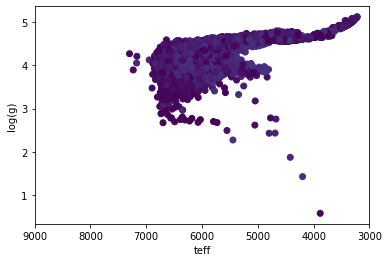

In [78]:
plt.scatter(ms_teff[j],ms_logg[j],c = ms_prot2[j],norm=normalize)
#plt.scatter(subgiant_surf['Mass'],subgiant_surf['log(g)'])
plt.xlabel('teff')
plt.ylabel('log(g)')
plt.xlim(9000.,3000)
#plt.xlim(0.7,1.5)

Text(0, 0.5, 'log(g)')

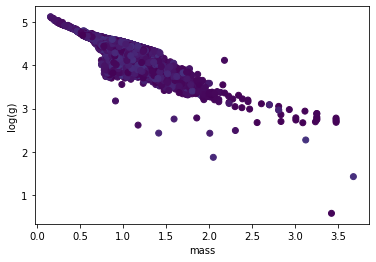

In [79]:
plt.scatter(ms_mass[j],ms_logg[j],c = ms_prot2[j], norm=normalize)
#plt.scatter(subgiant_surf['Mass'],subgiant_surf['log(g)'])
plt.xlabel('mass')
plt.ylabel('log(g)')
#plt.ylim(0.,500)
#plt.xlim(0.7,1.5)

Text(0, 0.5, 'surf_rot')

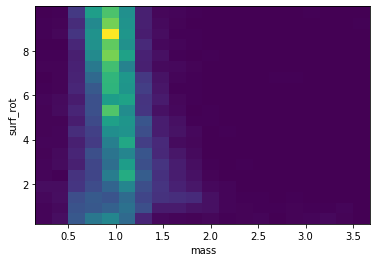

In [87]:
plt.hist2d(ms_mass[j],ms_prot2[j],bins = [20,20])
plt.xlabel('mass')
plt.ylabel('surf_rot')
#plt.ylim(0,100)

(array([  5.,   7.,  14.,   8.,  11.,   9.,  12.,  15.,  20.,  25.,  92.,
        134.,  97., 138., 179., 221., 284., 320., 335., 388., 499., 484.,
        536., 604., 608., 586., 598., 444., 400., 368., 267., 199., 152.,
        112., 104.,  82.,  72.,  63.,  70.,  60.,  39.,  43.,  38.,  36.,
         28.,  36.,  17.,  14.,  20.,  14.,  10.,   6.,   8.,   9.,   3.,
          4.,   2.,   2.,   3.,   0.,   2.,   1.,   1.,   2.,   0.,   3.,
          0.,   0.,   1.,   1.,   0.,   0.,   2.,   0.,   0.,   3.,   2.,
          0.,   1.,   0.,   2.,   0.,   0.,   1.,   2.,   0.,   0.,   6.,
          0.,   0.,   0.,   0.,   1.,   0.,   4.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.155  , 0.19026, 0.22552, 0.26078, 0.29604, 0.3313 , 0.36656,
        0.40182, 0.43708, 0.47234, 0.5076 , 0.54286, 0.57812, 0.61338,
        0.64864, 0.6839 , 0.71916, 0.75442, 0.78968, 0.82494, 0.8602 ,
        0.89546, 0.93072, 0.96598, 1.00124, 1.0365 , 1.07176, 1.10702,
        1.14228, 1.17754, 1.2128 ,

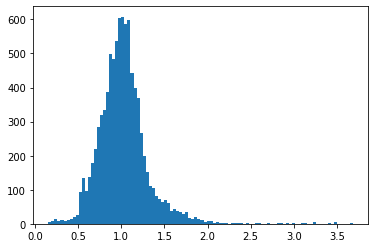

In [96]:
plt.hist(ms_mass[j],bins=100)

(array([ 80.,  82.,  77., 111.,  73.,  87.,  82.,  78.,  85.,  96., 104.,
         93.,  83.,  80.,  84.,  87.,  99.,  74.,  86.,  87., 102., 102.,
         82.,  98.,  88.,  71.,  83.,  90., 105.,  75.,  87.,  74.,  79.,
         87.,  79.,  90.,  85.,  72.,  77.,  75.,  80.,  82.,  93.,  75.,
         88.,  67.,  90.,  89., 104.,  84.,  84.,  86.,  80.,  96.,  92.,
         74.,  80.,  71., 116.,  75.,  71.,  84.,  99.,  81., 103.,  80.,
        101.,  84.,  82., 102.,  78.,  77., 102.,  69., 106., 114.,  62.,
        103., 104., 117., 105., 106., 101.,  89.,  86., 115.,  87.,  79.,
        106., 174.,  84.,  89., 102., 105., 110., 111.,  94., 105.,  80.,
        108.]),
 array([0.202  , 0.29997, 0.39794, 0.49591, 0.59388, 0.69185, 0.78982,
        0.88779, 0.98576, 1.08373, 1.1817 , 1.27967, 1.37764, 1.47561,
        1.57358, 1.67155, 1.76952, 1.86749, 1.96546, 2.06343, 2.1614 ,
        2.25937, 2.35734, 2.45531, 2.55328, 2.65125, 2.74922, 2.84719,
        2.94516, 3.04313, 3.1411 ,

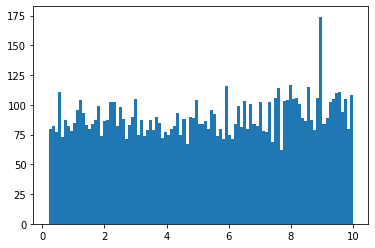

In [100]:
plt.hist(ms_prot2[j],bins=100)

In [80]:
slower

NameError: name 'slower' is not defined

(9000.0, 3000)

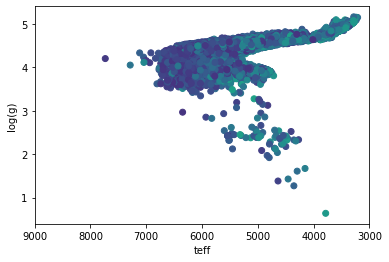

In [81]:
plt.scatter(ms_teff[jj],ms_logg[jj],c = ms_prot2[jj], norm=normalize)
#plt.scatter(subgiant_surf['Mass'],subgiant_surf['log(g)'])
plt.xlabel('teff')
plt.ylabel('log(g)')
plt.xlim(9000.,3000)
#plt.xlim(0.7,1.5)

Text(0, 0.5, 'log(g)')

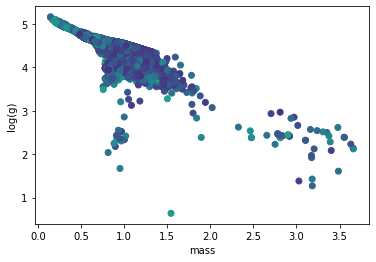

In [82]:
plt.scatter(ms_mass[jj],ms_logg[jj],c = ms_prot2[jj], norm=normalize)
#plt.scatter(subgiant_surf['Mass'],subgiant_surf['log(g)'])
plt.xlabel('mass')
plt.ylabel('log(g)')
#plt.ylim(0.,500)
#plt.xlim(0.7,1.5)

Text(0, 0.5, 'surf_rot')

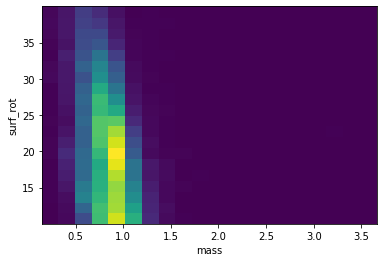

In [91]:
plt.hist2d(ms_mass[jj],ms_prot2[jj],bins = [20,20])
plt.xlabel('mass')
plt.ylabel('surf_rot')
#plt.ylim(0,100)

Text(0.5, 0, 'mass')

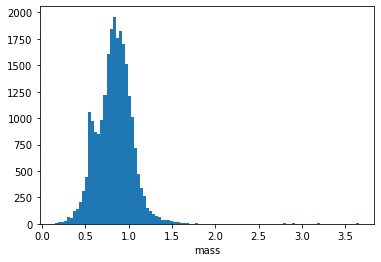

In [103]:
plt.hist(ms_mass[jj],bins=100)
plt.xlabel('mass')
#plt.ylabel('surf_rot')
#plt.ylim(0,100)

(array([346., 345., 402., 406., 364., 336., 438., 334., 365., 371., 353.,
        358., 371., 396., 353., 309., 455., 315., 344., 333., 345., 359.,
        326., 338., 333., 326., 417., 314., 352., 337., 345., 360., 369.,
        334., 328., 303., 424., 287., 317., 316., 314., 311., 294., 309.,
        299., 267., 335., 292., 274., 240., 267., 242., 216., 274., 231.,
        214., 249., 223., 235., 236., 228., 188., 196., 203., 187., 166.,
        181., 148., 148., 177., 196., 167., 152., 159., 135., 146., 163.,
        127., 125., 103.,  97.,  95., 106., 102.,  75.,  95.,  80.,  86.,
         82.,  81.,  71.,  77.,  65.,  72.,  73.,  75.,  68.,  47.,  61.,
         49.]),
 array([10.002  , 10.30193, 10.60186, 10.90179, 11.20172, 11.50165,
        11.80158, 12.10151, 12.40144, 12.70137, 13.0013 , 13.30123,
        13.60116, 13.90109, 14.20102, 14.50095, 14.80088, 15.10081,
        15.40074, 15.70067, 16.0006 , 16.30053, 16.60046, 16.90039,
        17.20032, 17.50025, 17.80018, 18.10011

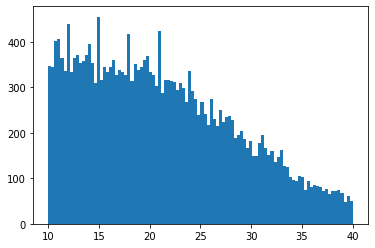

In [101]:
plt.hist(ms_prot2[jj],bins=100)

In [ ]:
slowest

(9000.0, 3000)

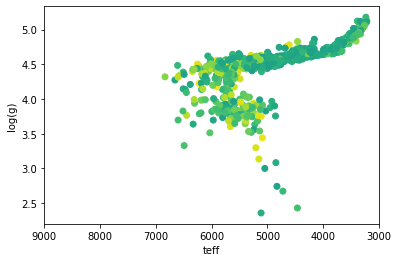

In [83]:
plt.scatter(ms_teff[jjj],ms_logg[jjj],c = ms_prot2[jjj], norm=normalize)
#plt.scatter(subgiant_surf['Mass'],subgiant_surf['log(g)'])
plt.xlabel('teff')
plt.ylabel('log(g)')
plt.xlim(9000.,3000)
#plt.xlim(0.7,1.5)

Text(0, 0.5, 'log(g)')

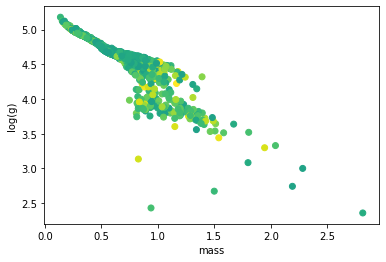

In [84]:
plt.scatter(ms_mass[jjj],ms_logg[jjj],c = ms_prot2[jjj], norm=normalize)
#plt.scatter(subgiant_surf['Mass'],subgiant_surf['log(g)'])
plt.xlabel('mass')
plt.ylabel('log(g)')
#plt.ylim(0.,500)
#plt.xlim(0.7,1.5)

Text(0, 0.5, 'surf_rot')

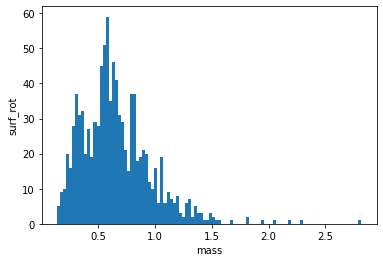

In [97]:
plt.hist(ms_mass[jjj],bins=100)
plt.xlabel('mass')
plt.ylabel('surf_rot')
#plt.ylim(0,100)

(array([45., 47., 47., 33., 44., 48., 47., 34., 39., 28., 17., 28., 22.,
        30., 15., 24., 12., 21., 14., 18., 16., 19., 12., 16., 10., 19.,
         7., 10.,  8., 11., 11., 10.,  5.,  7.,  9.,  7.,  8.,  7.,  5.,
         8.,  9.,  8.,  5.,  3.,  5.,  5.,  7.,  5.,  7.,  6.,  3.,  1.,
         5.,  3.,  5.,  6.,  2.,  3.,  1.,  2.,  3.,  2.,  1.,  3.,  3.,
         1.,  3.,  3.,  4.,  1.,  4.,  8.,  1.,  0.,  3.,  6.,  1.,  3.,
         0.,  0.,  0.,  0.,  0.,  4.,  4.,  2.,  3.,  2.,  3.,  0.,  1.,
         0.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([40.001  , 40.30074, 40.60048, 40.90022, 41.19996, 41.4997 ,
        41.79944, 42.09918, 42.39892, 42.69866, 42.9984 , 43.29814,
        43.59788, 43.89762, 44.19736, 44.4971 , 44.79684, 45.09658,
        45.39632, 45.69606, 45.9958 , 46.29554, 46.59528, 46.89502,
        47.19476, 47.4945 , 47.79424, 48.09398, 48.39372, 48.69346,
        48.9932 , 49.29294, 49.59268, 49.89242, 50.19216, 50.4919 ,
        50.79164, 51.09138

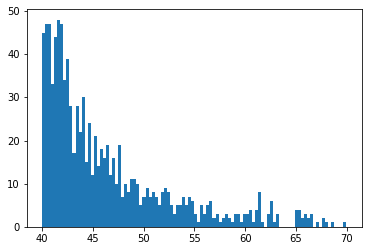

In [102]:
plt.hist(ms_prot2[jjj],bins=100)

Text(0, 0.5, 'log(g)')

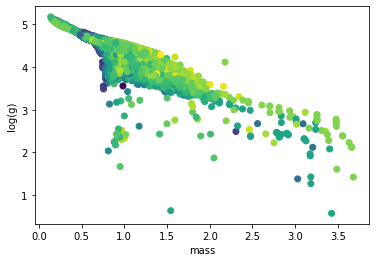

In [645]:
plt.scatter(ms_mass,ms_logg,c = ms_feh)
#plt.scatter(subgiant_surf['Mass'],subgiant_surf['log(g)'])
plt.xlabel('mass')
plt.ylabel('log(g)')
#plt.ylim(0.,500)
#plt.xlim(0.7,1.5)

In [ ]:
#conclusion


#relation between the distribution of the rotational rates of MS stars. Increase on rotational rate with increase
#in mass. There is evidence that the distribution of the rotational profile is constant in radius
#in MS stars. Therefore assume core and surface rotation show the same distribution.
#In RGB core and surface rotation rates we do not see a reflection of this distribution. Instead we see them flat with increase in mass at
#~600nHz. This could be owing to the observation bias of observing this specific rotational rate.
#considering the rotational rate doubles with an increase of about 0.5 M in the MS stars.
#we should expect to see an increase in the mean of the distribution core rotation rate of RGB stars with mass.
#this flat relation is also seen in RGB surface rotation rates.

#seemingly no change in the distribution of core/surface rotation rates with the evolution of the star along the RGB
#This is seen in the logg vs mass coloured by rotational rate plots.

#subgiant rotation rates show no clear relations with metallicity or mass. Any relation between mass and rotational rates
#is a result of the lower mass stars in the sample being younger in subgiant evolution.
#Interestingly, the surface rotation rates show an almost perfectly log shape with surface rotation rate vs log(g).
#I think this implies that the surface rotation rate is mostly relfected by the conservation of angular momentum
